project name: flexpart_management
created by diego aliaga daliaga_at_chacaltaya.edu.bo

imports

In [25]:

from useful_scit.imps import *
# noinspection PyUnresolvedReferences
import matplotlib.colors
import flexpart_management.modules.FlexLogPol as FlexLogPol
import flexpart_management.modules.constants as co
# noinspection PyUnresolvedReferences
import flexpart_management.modules.flx_array as fa

In [26]:
import flexpart_management.modules.clustering_funs as cfuns
plt.rcParams[ 'figure.facecolor' ] = 'white'
co.LAB = 'lab'



def plot_diurnal( cl , ds , lab , sg_filter=False ) :
    hour_local = 'hour_local'
    df , ds_l_s = get_hour_ds_df( cl , ds , hour_local , lab )
    if sg_filter is True:
        res = apply_sg_filter( df[cl] )
        df[cl] = df[cl] - res
    dg = df.groupby( hour_local )
    _m = dg.median()
    _min = dg.quantile( q=.25 )
    _max = dg.quantile( q=.75 )
    sns.set_style( 'darkgrid' )
    ds_l_s.plot()
    plt.show()
    f , ax = plt.subplots()
    ax: plt.Axes
    # _m.name = 'median'
    _m[ co.CONC ].plot( ax=ax , color='black' , label='median' )
    # _max.plot(ax=ax)
    # _min.plot(ax=ax)
    ax.fill_between( _max.index , _max[ co.CONC ] , _min[ co.CONC ] ,
                     alpha=.5 ,
                     label='25~75 [%]'
                     )
    title = f'diurnal variation | cluster: {lab} | sg_filter: {sg_filter}'
    yscale = 'linear' if sg_filter else 'log'
    ax.set(
        yscale=yscale, xlabel='local time [hour]' ,
        ylabel=cl ,
        title= title  )
    ax.legend()
    plt.show()


def get_hour_ds_df( cl , ds , hour_local , lab ) :
    lab_bool = ds[ co.LAB ] == lab
    ds_lab = ds[ cl ].where( lab_bool )
    ds_l_s = ds_lab.sum( fa.get_dims_complement( ds_lab , co.RL ) )
    ds_l_s[ hour_local ] = ds_l_s[ co.RL ].dt.hour - 4 + .5
    df: pd.DataFrame = ds_l_s.to_dataframe()
    df[ hour_local ] = np.mod( df[ hour_local ] , 24 )
    return df , ds_l_s

def apply_sg_filter( df ) :
    df_con = df
    import scipy.signal as ss
    df_sg = df[ [ ] ].copy()
    df_sg[ 'sg' ] = ss.savgol_filter( df_con , 25 , 1 , mode='nearest' )
    res = df_sg[ 'sg' ]
    return res

In [27]:
# def main() :

In [28]:

log.ger.setLevel( log.log.DEBUG )

In [29]:
# noinspection PyUnusedLocal,PyShadowingNames
def open_if_taito() :
    # noinspection SpellCheckingInspection
    path = \
        '/homeappl/home/aliagadi/wrk/DONOTREMOVE' \
        '/flexpart_management_data/runs/' \
        'run_2019-10-02_13-42-52_/' \
        'log_pol/run_2019-10-02_13-42-52_'
    # flp = FLP.FlexLogPol(path,concat=True)
    # flp_instance = FLP.FlexLogPol(path,concat=False)
    selfFLP = FlexLogPol.FlexLogPol(
        path ,
        # concat=True,
        concat=False ,
        get_clusters=False ,
        # open_merged=False,
        open_merged=True ,
        # merge_ds=False ,
        # merge_ds=True ,
        clusters_avail=False ,

        # postprocess set to false since we are opening the re interpolated
        # version
        postprocess=False ,

        use_new_merge_fun=True ,

        # set to false bc already done in the saved version
        filter_r_min_max=False ,
        )
    selfFLP.get_list_datasets_saved()
    # noinspection PyUnresolvedReferences
    ds = selfFLP.open_ds_version( 'ds_clustered_18.nc' )
    return selfFLP , ds

In [30]:
# selfFLP,ds = open_if_taito()
path = '/Users/diego/flexpart_management/flexpart_management/tmp_data' \
       '/ds_clustered_18.nc'
ds = xr.open_dataset( path )

In [ ]:
cl = co.CONC
lab = 2
lab_list = [ 16 , 17 , 13 , 12 , 11 , 10 , 5 , 3 , 2 ]

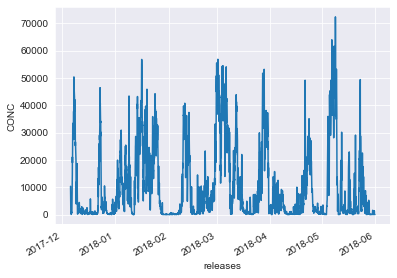

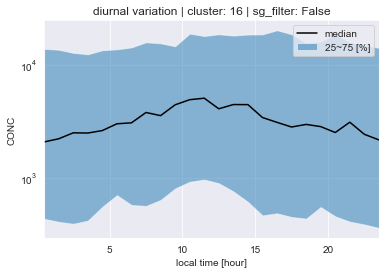

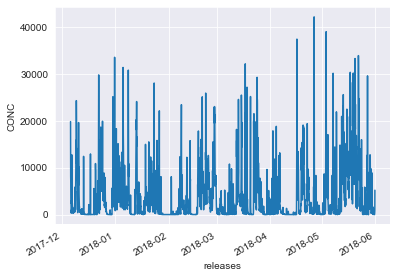

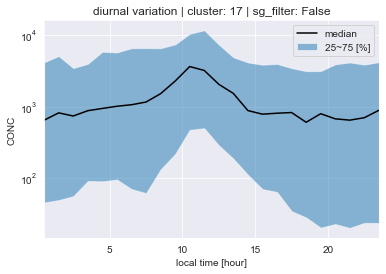

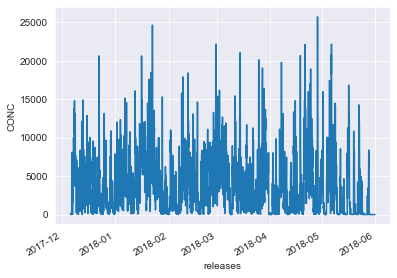

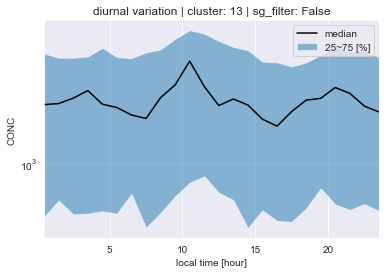

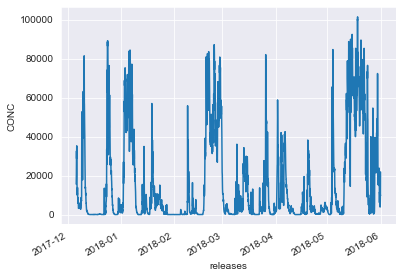

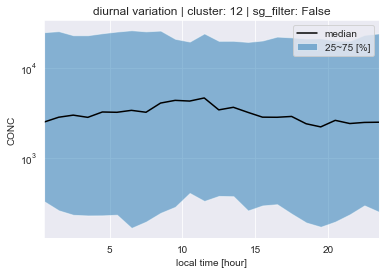

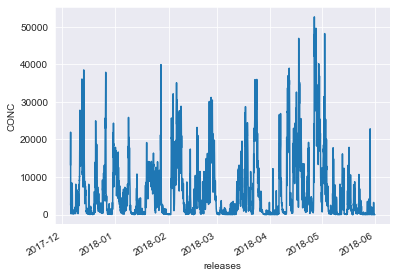

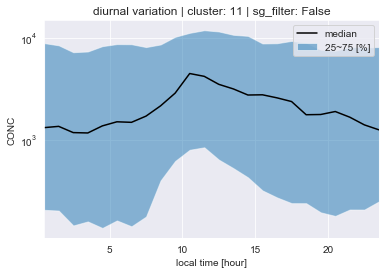

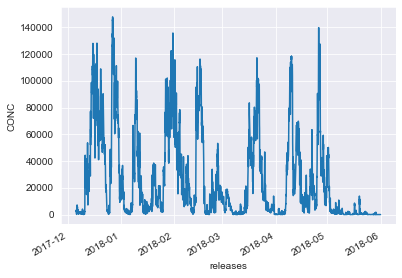

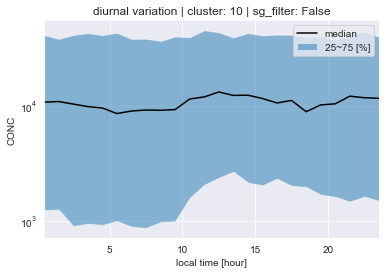

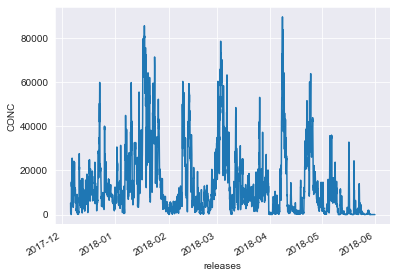

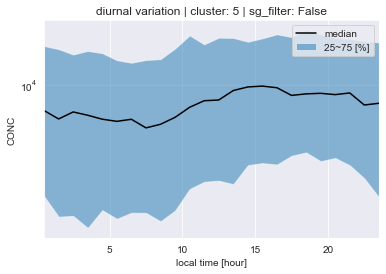

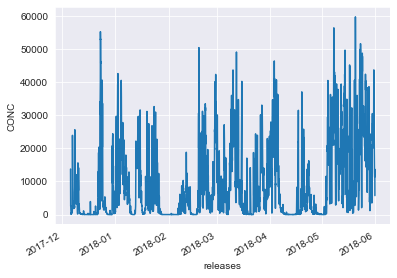

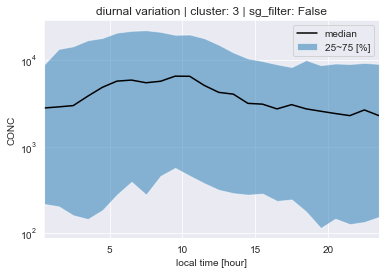

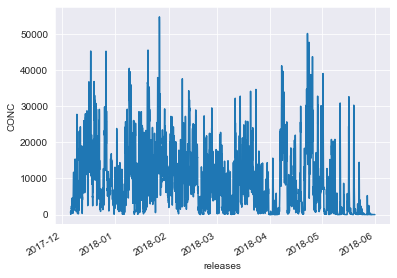

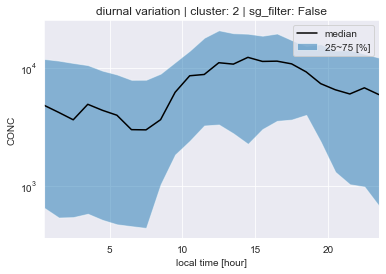

In [32]:
for lab in lab_list:
    plot_diurnal( cl , ds , lab )

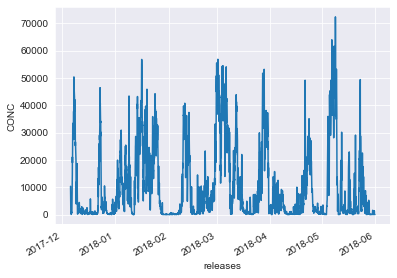

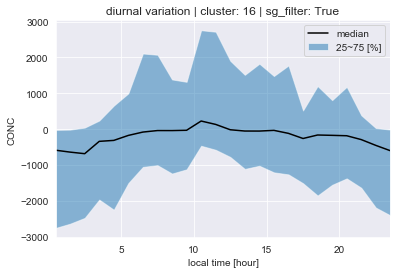

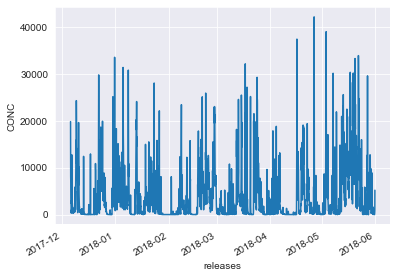

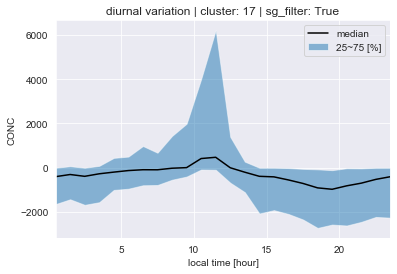

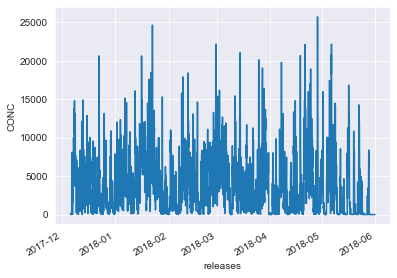

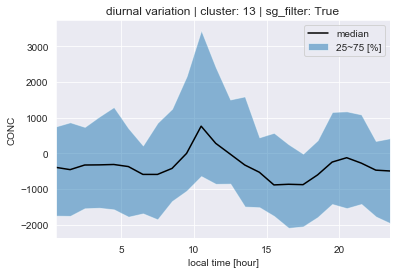

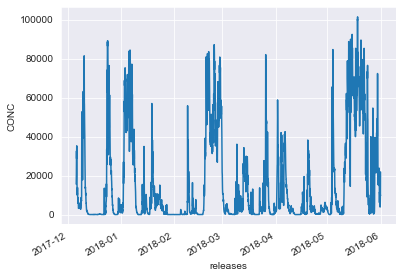

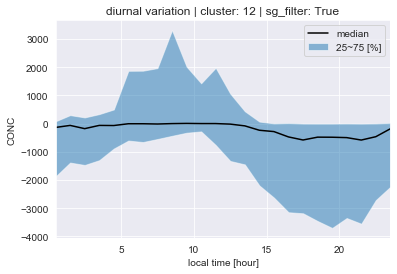

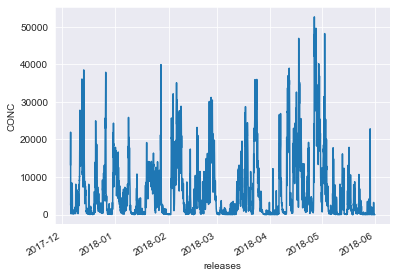

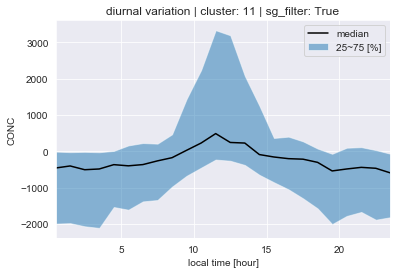

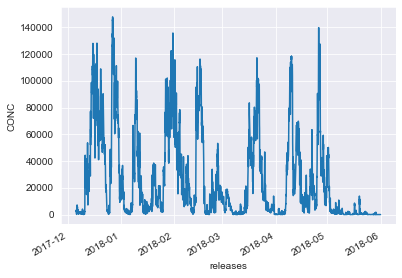

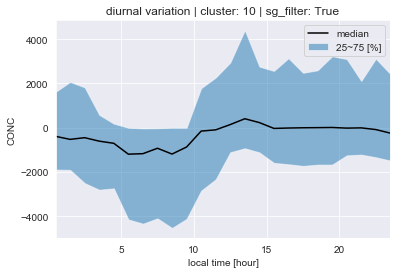

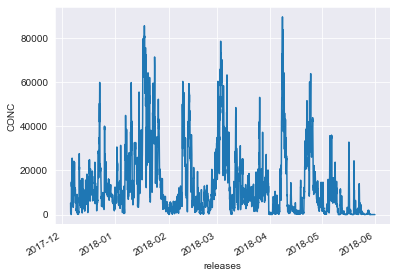

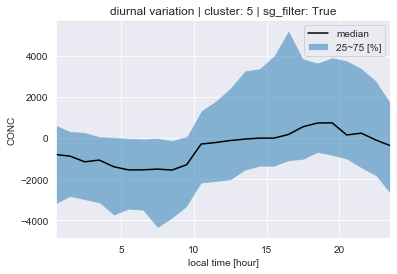

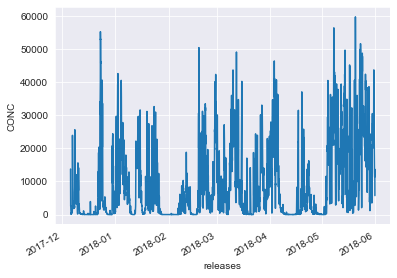

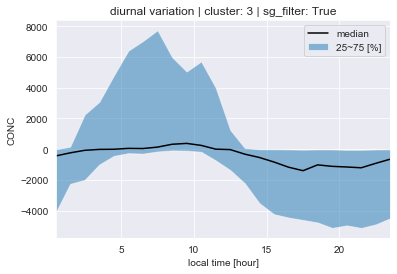

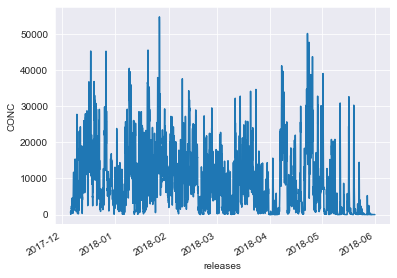

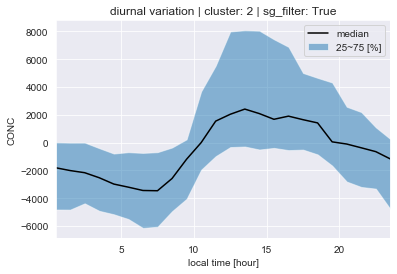

In [31]:
for lab in lab_list:
    plot_diurnal( cl , ds , lab ,sg_filter=True)

In [ ]:
# main()